<a href="https://colab.research.google.com/github/ciaranomalley/cs-for-psych/blob/master/ML_Project_CiaranOMalley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project rough work
Machine Learning project Training a neural network to accurately recognise numbers

In [1]:
!pip install tensorflow keras numpy mnist matplotlib

#Importing


In [2]:
import numpy as np
import mnist #dataset
import matplotlib.pyplot as plt

%matplotlib inline


from keras.models import Sequential #ANN Architecture
from keras.layers import Dense, Flatten, Activation #The layers in the ANN
from keras.utils import to_categorical
from keras.losses import BinaryCrossentropy

#Load data set

In [3]:
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() # training data labels
test_images = mnist.test_images() #trainign data imaegs
test_labels = mnist.test_labels() #training data labels

# Normalize the images

In [4]:
# Normalize the images, normalize pixel values from 0:255 to go from -0.5:0.5
train_images = (train_images/255) 
test_images = (test_images/255) 

#Flatten images from a 28x28 to a 784x1(28^2) dimensional images 
train_images = train_images.reshape ((-1,784))
test_images = test_images.reshape ((-1,784))
#Print the shape 
print(train_images.shape) #60,000 rows / 784 col
print(test_images.shape) #10,000 rows/ 784 col

(60000, 784)
(10000, 784)


#Building the model

In [5]:
#3 layers, 2 layers with 64 neurons and the relu function
#1 layer with 10 neurons and softmax function -- as digits 0-9 (10 possible values) softmax function 
model = Sequential()
model.add( Dense(64, activation ='relu' , input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='softmax'))

#Compiling model

In [6]:
#Loss function measures accuracy and tries to improve it using optimizer 
model.compile(
    optimizer='adam', #why adam?
      loss = 'categorical_crossentropy', # (classes that are > 2)
      metrics = ['accuracy']
)

#Training the model 

In [7]:
model.fit(
    train_images,
      to_categorical(train_labels), # Ex. 2 it expect [0,0,1,0,0,0,0,0,0,0,] A 10 dimensional vector
      epochs = 10, #No of iteratrions over the dataset
      batch_size=128, #no of samples per gradient update

)
   

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7574 - accuracy: 0.7800
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1846 - accuracy: 0.9443
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1294 - accuracy: 0.9623
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1012 - accuracy: 0.9704
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0870 - accuracy: 0.9735
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0732 - accuracy: 0.9775
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9813
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0435 - accuracy: 0.9858
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0391 - accuracy: 0.9875

469 x 128  60,032 train images. 

##For epochs plot


In [8]:
!pip install livelossplot --quiet

In [9]:
from livelossplot import PlotLossesKeras
from keras.datasets import mnist

%matplotlib inline

In [10]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.


In [12]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

In [13]:
plotlosses = PlotLossesKeras()

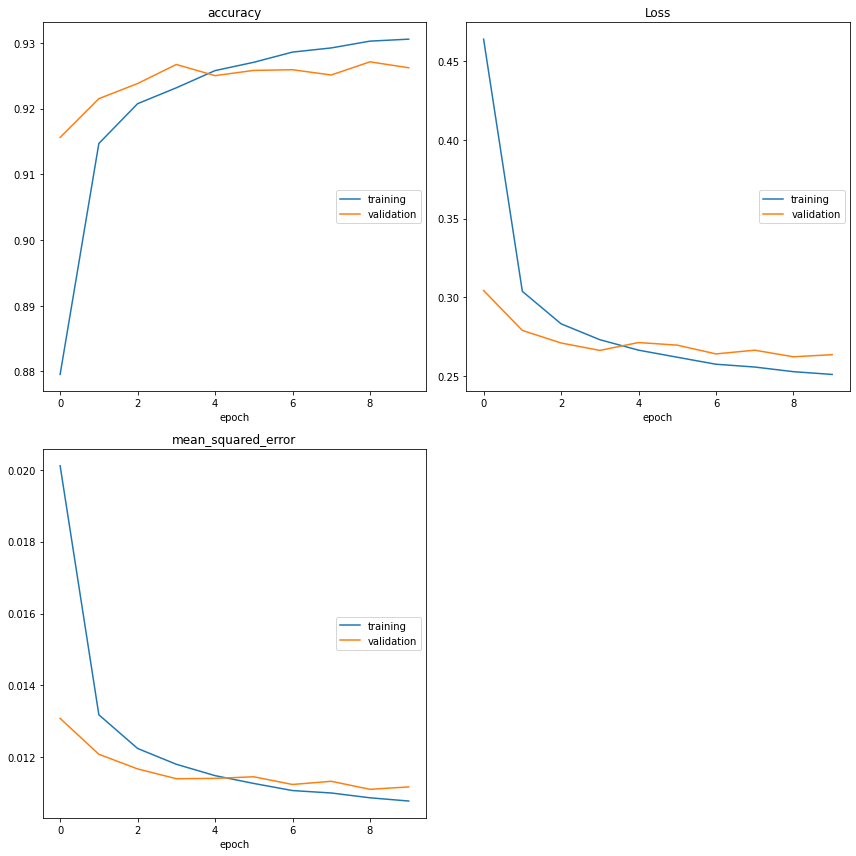

accuracy
	training         	 (min:    0.880, max:    0.931, cur:    0.931)
	validation       	 (min:    0.916, max:    0.927, cur:    0.926)
Loss
	training         	 (min:    0.251, max:    0.464, cur:    0.251)
	validation       	 (min:    0.262, max:    0.304, cur:    0.264)
mean_squared_error
	training         	 (min:    0.011, max:    0.020, cur:    0.011)
	validation       	 (min:    0.011, max:    0.013, cur:    0.011)


In [14]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plotlosses],
          verbose=False)

#Evaluating the model

In [15]:
model.fit(
    test_images,
      to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9285 - mean_squared_error: 0.0111


In [16]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.2421 - accuracy: 0.9321 - mean_squared_error: 0.0103


[0.24209658801555634, 0.9320999979972839, 0.010348120704293251]

312 batches of 32 test images. 312x32 = 10016.

#Saving model

In [17]:
model.save_weights('model.h5')

In [36]:
#predict on the first 5 test images

predictions = model.predict(test_images[:10]) #create variable of first 5 predictions
#print models prediction
print ('probability distributions for first 5 images') 
#print(predictions)
#convert predicions to 
print(np.argmax(predictions[0])) # use arg function to print out the labels 
print(np.argmax(predictions[2])) #3rd number in sequence
print(np.argmax(predictions[7])) #8th number in sequence
print(np.argmax(predictions[9])) #10th number in sequence
print(test_labels[:10])


probability distributions for first 5 images
7
1
9
9
[7 2 1 0 4 1 4 9 5 9]


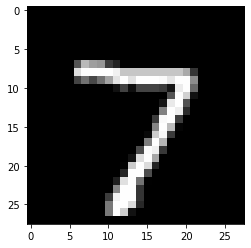

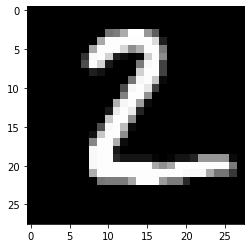

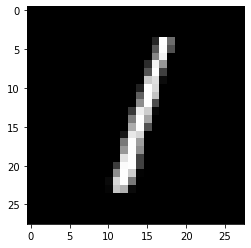

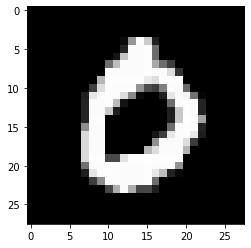

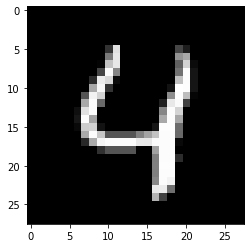

In [37]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [38]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


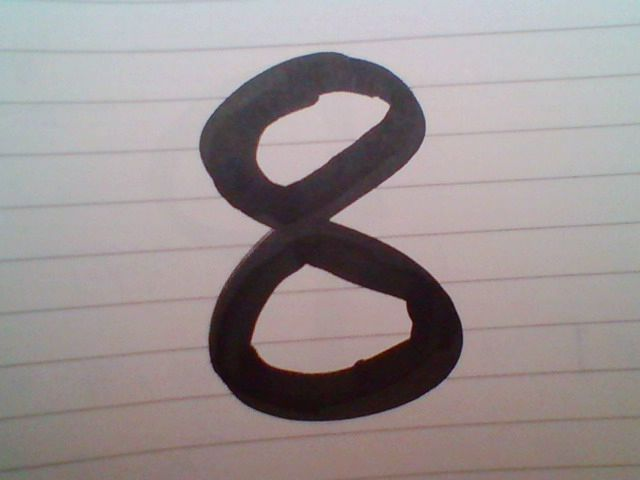

In [73]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


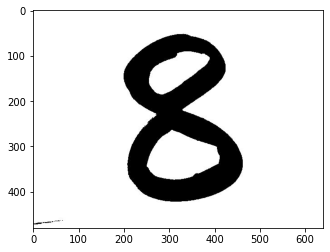

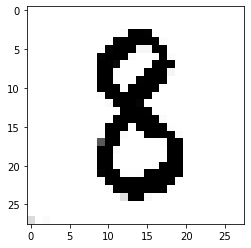

Probability Distribution for 0 0.007435806
Probability Distribution for 1 0.022459466
Probability Distribution for 2 0.08966774
Probability Distribution for 3 0.22943354
Probability Distribution for 4 0.00014253076
Probability Distribution for 5 0.3445109
Probability Distribution for 6 0.0067766574
Probability Distribution for 7 1.86821e-05
Probability Distribution for 8 0.29946908
Probability Distribution for 9 8.551368e-05
The Predicted Value is 5


In [74]:
import tensorflow as tf
import cv2
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
user_test = user_test.reshape ((-1,784))
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))